<a href="https://colab.research.google.com/github/gauravpks/dl-repo/blob/master/RNN/ARIMA_And_Seasonal_ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**ARIMA-And-Seasonal-ARIMA**

Autoregressive Integrated Moving Averages
The general process for ARIMA models is the following:

1. Visualize the Time Series Data
2. Make the time series data stationary
3. Plot the Correlation and AutoCorrelation Charts
4. Construct the ARIMA Model or Seasonal ARIMA based on the data
5. Use the model to make predictions

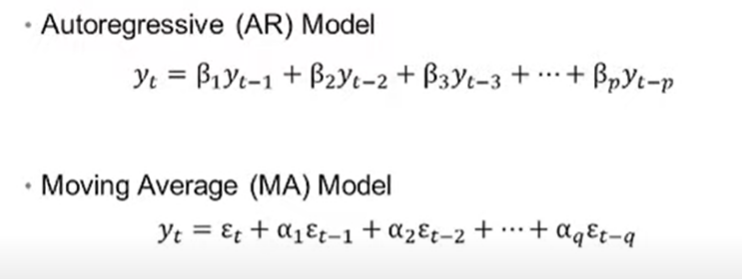

AR(p) makes predictions using previous values of the dependent variable. MA(q) makes predictions using the series mean and previous errors.

What sets ARMA and ARIMA apart is differencing. An ARMA model is a stationary model; If your model isn’t stationary, then you can achieve stationarity by taking a series of differences. The “I” in the ARIMA model stands for integrated; It is a measure of how many non-seasonal differences are needed to achieve stationarity. If no differencing is involved in the model, then it becomes simply an ARMA.

A model with a dth difference to fit and ARMA(p,q) model is called an ARIMA process of order (p,d,q).

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

##Visualize the Time Series Data

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/gauravpks/dl-repo/master/RNN/perrin-freres-monthly-champagne-.csv')

In [3]:
df.head()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [4]:
## Cleaning up the data
df.columns=["Month","Sales"]
df.head()

,Month,Sales
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [5]:
df.tail()

,Month,Sales
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0
105,NaN,NaN
106,Perrin Freres monthly champagne sales millions...,NaN


In [6]:
## Drop last 2 rows
df.drop(106,axis=0,inplace=True)
df.drop(105,axis=0,inplace=True)

In [7]:
# Convert Month into Datetime
df['Month']=pd.to_datetime(df['Month'])

In [8]:
df.set_index('Month',inplace=True)

In [9]:
df.head()

,Sales
Month,
1964-01-01,2815.0
1964-02-01,2672.0
1964-03-01,2755.0
1964-04-01,2721.0
1964-05-01,2946.0


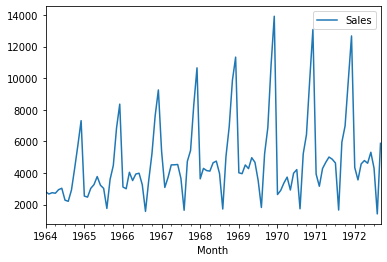

In [10]:
#Visualize the Data
df.plot()

Data does not look stationary and seems to have seasonility in it.. 

##Make the time series data stationary

In [ ]:
### Testing For Stationarity

from statsmodels.tsa.stattools import adfuller

**Dickey Fuller test (ADF Test) is a common statistical test used to test whether a given Time series is stationary or not**

https://en.wikipedia.org/wiki/Dickey%E2%80%93Fuller_test

In [ ]:
test_result=adfuller(df['Sales'])

In [ ]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [ ]:
adfuller_test(df['Sales'])

ADF Test Statistic : -1.8335930563276228
p-value : 0.363915771660245
#Lags Used : 11
Number of Observations Used : 93
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


##Sesional Shift

In [ ]:
df['Seasonal First Difference']=df['Sales']-df['Sales'].shift(12)

In [ ]:
df.head(36)

,Sales,Seasonal First Difference,forecast
Month,,,
1964-01-01,2815.0,NaN,NaN
1964-02-01,2672.0,NaN,NaN
1964-03-01,2755.0,NaN,NaN
1964-04-01,2721.0,NaN,NaN
1964-05-01,2946.0,NaN,NaN
1964-06-01,3036.0,NaN,NaN
1964-07-01,2282.0,NaN,NaN
1964-08-01,2212.0,NaN,NaN
1964-09-01,2922.0,NaN,NaN


In [ ]:
## Again test dickey fuller test
adfuller_test(df['Seasonal First Difference'].dropna())

ADF Test Statistic : -7.626619157213164
p-value : 2.060579696813685e-11
#Lags Used : 0
Number of Observations Used : 92
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


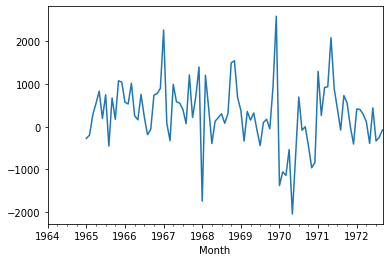

In [ ]:
df['Seasonal First Difference'].plot()

##Auto Regressive Model

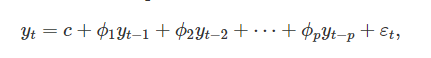

t-1, t-2 is the Lag

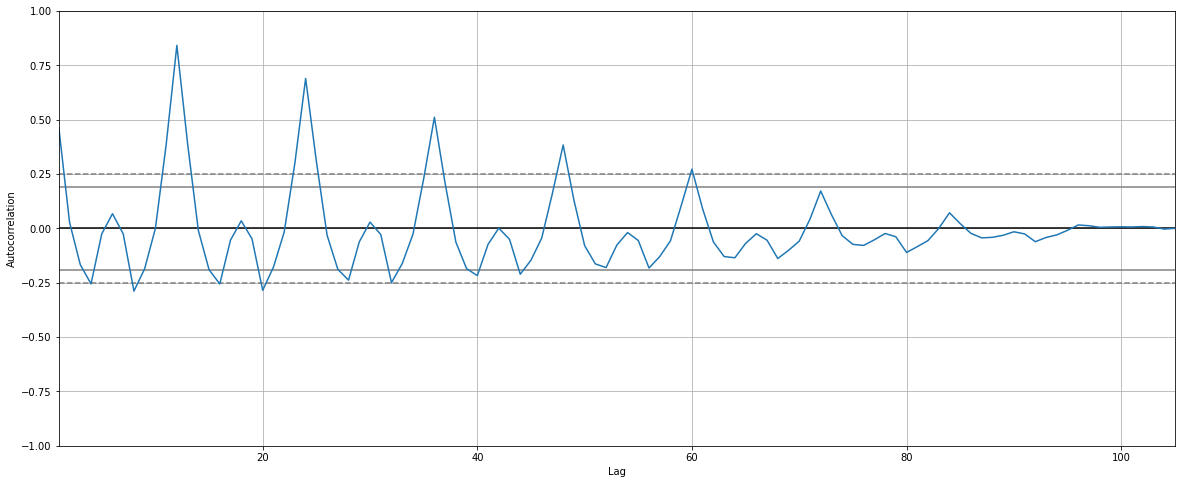

In [ ]:
from pandas.plotting import autocorrelation_plot
plt.figure(figsize=(20,8))
autocorrelation_plot(df['Sales'])
plt.show()
#p value:  1-- value comming in the boundry

**Final Thoughts on Autocorrelation and Partial Autocorrelation**

1. Identification of an AR model is often best done with the PACF(Particial Auto Corelation).

* For an AR model, the theoretical PACF “shuts off” past the order of the model. The phrase “shuts off” means that in theory the partial autocorrelations are equal to 0 beyond that point. Put another way, the number of non-zero partial autocorrelations gives the order of the AR model. By the “order of the model” we mean the most extreme lag of x that is used as a predictor.

2. Identification of an MA model is often best done with the ACF rather than the PACF.

* For an MA model, the theoretical PACF does not shut off, but instead tapers toward 0 in some manner. A clearer pattern for an MA model is in the ACF. The ACF will have non-zero autocorrelations only at lags involved in the model.

**p,d,q p**
1. p - AR Model Lag/order -PACF
2. d - order of differencing to make time series stationary
3. q - Moving Average Lag/order--ACF


In [ ]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf # auto colreation and partial auto corelation

In [ ]:
import statsmodels.api as sm

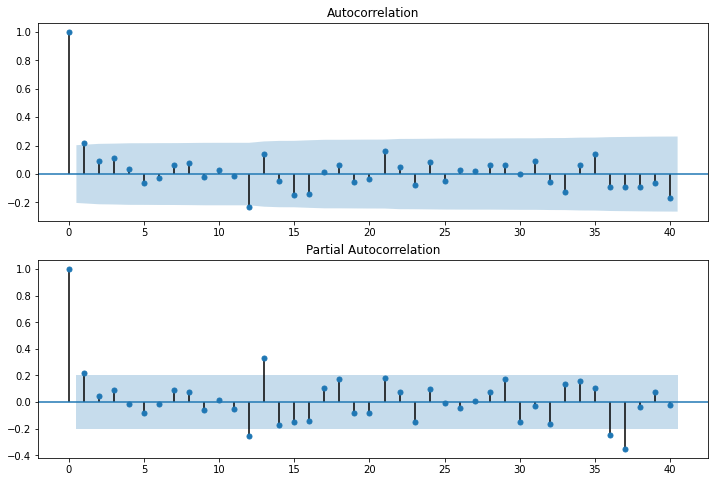

In [ ]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Seasonal First Difference'].dropna(),lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Seasonal First Difference'].dropna(),lags=40,ax=ax2)

Particial Auto Coorelation represents the coorelation between its series and lags

In [ ]:
# For non-seasonal data
#p=1, d=1, q= 1
# d= 1-- we did one time seasonal differencing.. one year as 1
from statsmodels.tsa.arima_model import ARIMA ## Whill only work when your data is not seasonal

In [ ]:
!pip install pmdarima

In [ ]:
from pmdarima.arima.utils import ndiffs

In [ ]:
ndiffs(df['Sales'],test='adf') #generally between 0,1,2 max..

0

##ARIMA

In [ ]:

model=ARIMA(df['Sales'],order=(1,1,1))
model_fit=model.fit()

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [ ]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  Sales   No. Observations:                  105
Model:                     ARMA(1, 1)   Log Likelihood                -955.740
Method:                       css-mle   S.D. of innovations           2164.705
Date:                Wed, 03 Feb 2021   AIC                           1919.479
Time:                        11:35:02   BIC                           1930.095
Sample:                    01-01-1964   HQIC                          1923.781
                         - 09-01-1972                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const        4769.3641    318.140     14.991      0.000    4145.821    5392.907
ar.L1.Sales    -0.1847      0.136     -1.360      0.177      -0.451       0.082
ma.L1.Sales     0.7889      0.086      9.213      0.000       0.621       0.957
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -5.4128           +0.0000j            5.4128            0.5000
MA.1           -1.2675           +0.0000j            1.2675            0.5000
-----------------------------------------------------------------------------
"""

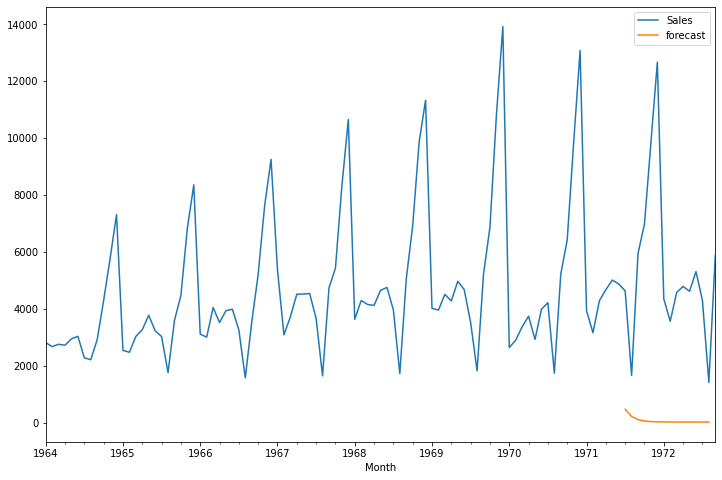

In [ ]:
df['forecast']=model_fit.predict(start=90,end=103,dynamic=True)
df[['Sales','forecast']].plot(figsize=(12,8))

##SARIMA

In [ ]:
model=sm.tsa.statespace.SARIMAX(df['Sales'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


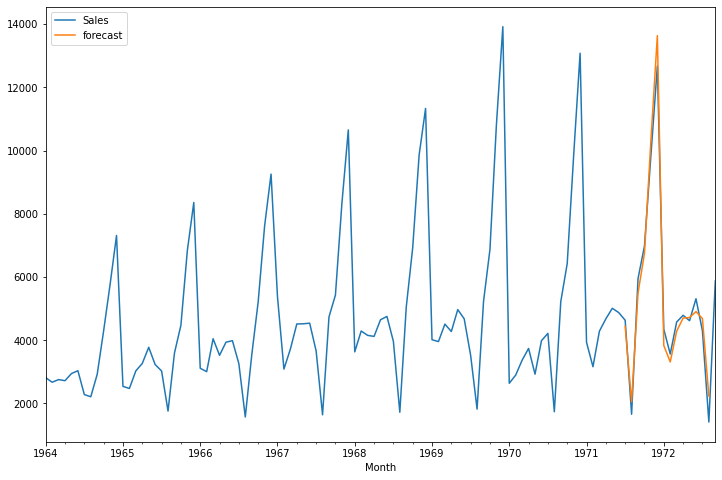

In [ ]:
df['forecast']=results.predict(start=90,end=103,dynamic=True)
df[['Sales','forecast']].plot(figsize=(12,8))

In [ ]:
from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+ DateOffset(months=x)for x in range(0,24)]

In [ ]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)

In [ ]:
future_datest_df.tail()

,Sales,Seasonal First Difference,forecast
1974-04-01,NaN,NaN,NaN
1974-05-01,NaN,NaN,NaN
1974-06-01,NaN,NaN,NaN
1974-07-01,NaN,NaN,NaN
1974-08-01,NaN,NaN,NaN


In [ ]:
future_df=pd.concat([df,future_datest_df])

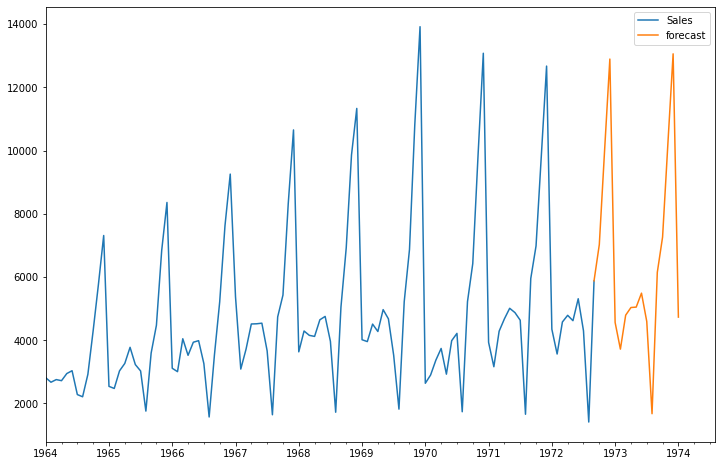

In [ ]:
future_df['forecast'] = results.predict(start = 104, end = 120, dynamic= True)  
future_df[['Sales', 'forecast']].plot(figsize=(12, 8))

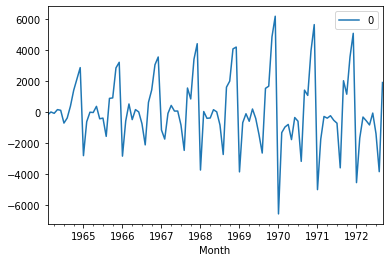

In [ ]:
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()

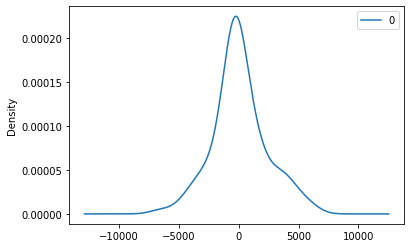

In [ ]:
residuals.plot(kind='kde')

In [ ]:
residuals.describe()

,0
count,104.000000
mean,87.788859
std,2257.896966
min,-6548.784911
25%,-821.173215
50%,-87.546211
75%,1221.514702
max,6177.225180


#LTSM

In [11]:
df

,Sales
Month,
1964-01-01,2815.0
1964-02-01,2672.0
1964-03-01,2755.0
1964-04-01,2721.0
1964-05-01,2946.0
...,...
1972-05-01,4618.0
1972-06-01,5312.0
1972-07-01,4298.0


In [34]:
df.shape

(105,)

In [30]:
df =df.ravel()

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import matplotlib as mpl


In [35]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df=scaler.fit_transform(np.array(df).reshape(-1,1))

In [36]:
##splitting dataset into train and test split
training_size=int(len(df)*0.80)
test_size=len(df)-training_size
train_data,test_data=df[0:training_size,:],df[training_size:len(df),:1]

In [38]:
training_size,test_size

(84, 21)

In [37]:
train_data.shape

(84, 1)

Data Preprocessing

In [39]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [40]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 10
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [41]:
print(X_train.shape), print(y_train.shape)

(73, 10)
(73,)


(None, None)

In [42]:
print(X_test.shape), print(ytest.shape)

(10, 10)
(10,)


(None, None)

In [43]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [44]:
print(X_train.shape), print(y_train.shape)

(73, 10, 1)
(73,)


(None, None)